# Approximate π

In [1]:
import math  as m
import numpy as np
import multiprocessing as mp
import os 
import time
import matplotlib.pyplot as plt
import pandas
%matplotlib notebook

### Function for π approximation

In [2]:
def pi_approx(points,x,piQueue):
    np.random.seed()
    iD = mp.current_process().name
    circleCount = 0.0
    rand_x = np.zeros(points)  #Creating an empty NumPy array
    rand_y = np.zeros(points)  #Creating an empty NumPy array
    for i in range(points):
        rand_x[i] = np.random.uniform(-1,1) #Generating a sequence of N random numbers between [-1,1]
        rand_y[i] = np.random.uniform(-1,1) #Generating a sequence of N random numbers between [-1,1]
        if (rand_x[i]**2 + rand_y[i]**2) <= 1.0:
            circleCount +=1
        val  =  'Approx. Value = {:.3f} from {}' .format((circleCount/points)*4,  iD) 
    if(multiProc):
        if(Print_Statement):
            piQueue.put((x, val))
        else:
            piQueue.put((circleCount/points)*4)
    else:
        #For Visualizing Monte-Carlo Approximation of pi
        if(Enable_Visualizing == 1):
            plt.ylim((-1.25,1.25))
            plt.xlim((-1.25,1.25))
            plt.plot(rand_x, rand_y, 'o', color='r')
            for i in range(points):
                if (rand_x[i]**2 + rand_y[i]**2) <= 1.0:
                    plt.plot(rand_x[i], rand_y[i], 'o', color='b')
        return val

### Performance on 1-CPU
#### Timing

In [3]:
#Setting Flags
multiProc = False
Enable_Visualizing = False
Print_Statement = True
tr = %timeit -n 3 -r 5 -o pass; pi_approx(10000,-9999,multiProc)
print((tr.best)) 

3 loops, best of 5: 30.3 ms per loop
0.03030954704930385


#### Value of π

In [4]:
val_pi = pi_approx(10000,-9999,multiProc)
print(val_pi)

Approx. Value = 3.118 from MainProcess


### Performance on Multiple CPU's

#### Timing

In [5]:
%%time
multiProc = True
N = 10000 #Number of points in the sequence 
num_process = mp.cpu_count() #Total Number of processes
jobs = []
results = []
piQueue = mp.Queue()
for i in range(num_process):
    job = mp.Process(target=pi_approx,args=[N,i,piQueue])
    job.start()
    jobs.append(job)
for i in range(num_process):
    jobs[i].join

CPU times: user 12.8 ms, sys: 39.9 ms, total: 52.7 ms
Wall time: 52.9 ms


#### Value of π

In [6]:
results = [piQueue.get() for p in range(piQueue.qsize())]
results.sort()
results = [r[1] for r in results]
for r in results:
    print(r)

Approx. Value = 3.160 from Process-1
Approx. Value = 3.142 from Process-2
Approx. Value = 3.118 from Process-3
Approx. Value = 3.136 from Process-4
Approx. Value = 3.141 from Process-5
Approx. Value = 3.135 from Process-6
Approx. Value = 3.120 from Process-7
Approx. Value = 3.131 from Process-8
Approx. Value = 3.141 from Process-9


## Visualizing Monte-Carlo Approximation of π

<IPython.core.display.Javascript object>


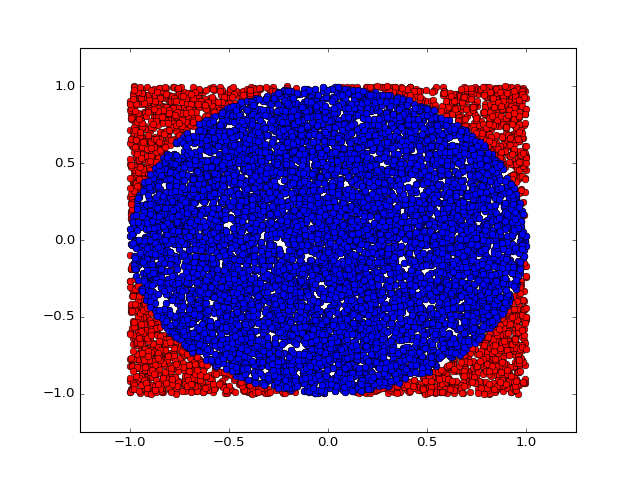

'Approx. Value = 3.128 from MainProcess'

In [7]:
Enable_Visualizing = True
multiProc = False
pi_approx(10000,-9999,False)

## Timing complexity Analysis by increasing N on Multiple CPU's

In [8]:
def multiProcPiApprox(N,np):
    for i in range(np):
        job = mp.Process(target=pi_approx,args=[N,i,piQueue])
        job.start()
        jobs.append(job)
    for i in range(num_process):
        jobs[i].join
    time.sleep(0.1)

In [9]:
#Setting Flags
multiProc = True
Enable_Visualizing = False
Print_Statement = False

num_process = 4 #Total Number of processes
jobs = []
piQueue = mp.Queue() 
avgPiValue = []
error = []
numPoints = [200, 400, 600, 800, 1000, 2000, 4000, 8000]
for i,testPoints in enumerate(numPoints):
    results = []
    jobs = []
    multiProcPiApprox(testPoints,num_process)
    results = [piQueue.get() for p in range(piQueue.qsize())]
    avgPiValue.append(sum(results)/4)
    error.append(abs(sum(results)/4 - 3.142))

PointsUsed = pandas.Series(numPoints,dtype='d')
Pi_Value = pandas.Series(avgPiValue,dtype='d')
Avg_Error = pandas.Series(error,dtype='d')
df = pandas.DataFrame({'Points' : PointsUsed, 'Avg. Pi Value' : Pi_Value, 'Error' : Avg_Error })
print(df.set_index('Points'))

        Avg. Pi Value     Error
Points                         
200.0        3.105000  0.037000
400.0        3.030000  0.112000
600.0        3.150000  0.008000
800.0        3.055000  0.087000
1000.0       3.140000  0.002000
2000.0       3.139500  0.002500
4000.0       3.147250  0.005250
8000.0       3.134875  0.007125
